In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#load the data 
transaction_data = pd.read_csv(r"D:\virtual_experience\quantium\QVI_transaction_data.csv")
purchase_behaviour = pd.read_csv(r"D:\virtual_experience\quantium\QVI_purchase_behaviour.csv")

# 1. Eploratory Data Analysis 

## Examing transaction dataset

In [59]:
# checking the general information on transaction data
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [60]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [61]:
transaction_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In this case, date is in integer format, we have to chang it to the date time format 

In [62]:
#convert date integer to datetime format
transaction_data['DATE']=pd.to_datetime(transaction_data['DATE']-2,unit="d",origin=pd.Timestamp("1900-01-01"))

In [63]:
#recheck the datet column
transaction_data.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [64]:
transaction_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [65]:
# Remove salsa product since we dont want them
transaction_data[transaction_data['PROD_NAME'].str.contains('salsa',case =False)]['PROD_NAME'].value_counts()

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Woolworths Mild     Salsa 300g              1491
Doritos Salsa Mild  300g                    1472
Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Doritos Salsa       Medium 300g             1449
Woolworths Medium   Salsa 300g              1430
Name: PROD_NAME, dtype: int64

In [66]:
#remove non chip column
salsa_column = transaction_data[transaction_data['PROD_NAME'].str.contains('salsa',case =False)]
salsa_index = salsa_column.index
new_trans = transaction_data.drop(salsa_index,axis=0).reset_index(drop =True)
new_trans.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
6,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
7,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
8,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
9,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [67]:

# Add in brand Column
new_trans['BRAND'] = new_trans['PROD_NAME'].apply(lambda x : x.strip().split()[0])
brands = {'Dorito':'Doritos','Infzns':'Infuzions',
          'Snbts':'Sunbites','Grain':'Grain Wave',
          'RRD':'Red Rock Deli','Smith':'Smiths',
          'GrnWves':'Grain Wave','WW':'Woolworths',
          'NCC':'Natural','Red':'Red Rock Deli'}
new_trans['BRAND'] = new_trans['BRAND'].replace(brands)
new_trans.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [68]:
#remove brand from product name
new_trans['PROD_NAME']= new_trans['PROD_NAME'].apply(lambda x:x.split(' ',1)[1])

In [69]:
#Check if any brand is repeated.
new_trans.BRAND.value_counts().sort_index()

Burger            1564
CCs               4551
Cheetos           2927
Cheezels          4603
Cobs              9693
Doritos          25226
French            1418
Grain Wave        7740
Infuzions        14201
Kettle           41288
Natural           7469
Pringles         25102
Red Rock Deli    16321
Smiths           30353
Sunbites          3008
Thins            14075
Tostitos          9471
Twisties          9454
Tyrrells          6442
Woolworths       11836
Name: BRAND, dtype: int64

In [72]:
#extract size and create a new column
new_trans['SIZE']=new_trans['PROD_NAME'].str.extract(r'(\d+)(g|G)')

In [73]:
new_trans.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SIZE
0,2018-10-17,1,1000,1,5,Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150
5,2019-05-16,4,4149,3333,16,Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths,330
6,2019-05-16,4,4196,3539,24,Waves Sweet Chilli 210g,1,3.6,Grain Wave,210
7,2018-08-20,5,5026,4525,42,Corn Chip Mexican Jalapeno 150g,1,3.9,Doritos,150
8,2018-08-18,7,7150,6900,52,Waves Sour Cream&Chives 210G,2,7.2,Grain Wave,210
9,2019-05-17,7,7215,7176,16,Crinkle Chips Salt & Vinegar 330g,1,5.7,Smiths,330


In [74]:
#remove size from product name
new_trans['PROD_NAME']= new_trans['PROD_NAME'].str.replace(r'\d+(g|G)','')

In [75]:
new_trans.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SIZE
0,2018-10-17,1,1000,1,5,Chip Compny SeaSalt,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,Nacho Cheese,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Crinkle Cut Chips Chicken,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Chip Thinly S/Cream&Onion,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Tortilla ChpsHny&Jlpno Chili,3,13.8,Kettle,150


In [76]:
new_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246742 entries, 0 to 246741
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   BRAND           246742 non-null  object        
 9   SIZE            246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 18.8+ MB


In [77]:
#Find product unit price and add it as a column to the table
new_trans['UNIT_PRICE'] = new_trans['TOT_SALES']/new_trans['PROD_QTY']
new_trans.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SIZE,UNIT_PRICE
0,2018-10-17,1,1000,1,5,Chip Compny SeaSalt,2,6.0,Natural,175,3.00
1,2019-05-14,1,1307,348,66,Nacho Cheese,3,6.3,CCs,175,2.10
2,2019-05-20,1,1343,383,61,Crinkle Cut Chips Chicken,2,2.9,Smiths,170,1.45
3,2018-08-17,2,2373,974,69,Chip Thinly S/Cream&Onion,5,15.0,Smiths,175,3.00
4,2018-08-18,2,2426,1038,108,Tortilla ChpsHny&Jlpno Chili,3,13.8,Kettle,150,4.60


In [78]:
#data summary from transaction table
new_trans.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,UNIT_PRICE
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,3.832411
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,1.077798
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,1.320000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,3.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,3.800000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,4.600000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,6.500000


D:\anaconda\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

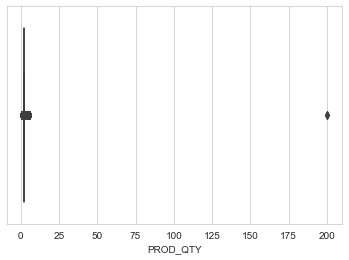

In [79]:
#Use boxplot to see if there is any outlier.
sns.boxplot(new_trans['PROD_QTY'])

In [80]:
#Check the outliers
new_trans[new_trans['PROD_QTY']>190]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SIZE,UNIT_PRICE
64955,2018-08-19,226,226000,226201,4,Corn Chp Supreme,200,650.0,Doritos,380,3.25
64956,2019-05-20,226,226000,226210,4,Corn Chp Supreme,200,650.0,Doritos,380,3.25


D:\anaconda\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

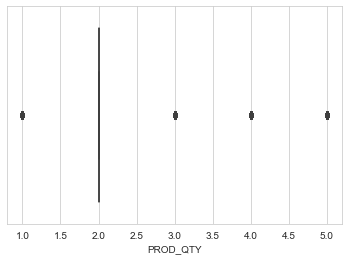

In [81]:
#remove the column with outliers
tran = new_trans[new_trans['PROD_QTY'] < 190]
sns.boxplot(tran['PROD_QTY'])

In [82]:
#look at product quantity summary after removing outliers
tran['PROD_QTY'].describe()

count    246740.000000
mean          1.906456
std           0.342499
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: PROD_QTY, dtype: float64

<AxesSubplot:xlabel='DATE', ylabel='STORE_NBR'>

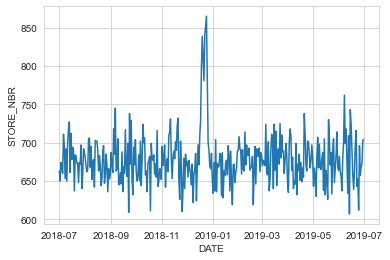

In [83]:
#Use histogram to look at the distribution of transactions by date: balanced.
date_plot =tran.groupby('DATE',as_index =False)[['STORE_NBR']].count()
sns.lineplot(data=date_plot, x="DATE", y="STORE_NBR")

<AxesSubplot:>

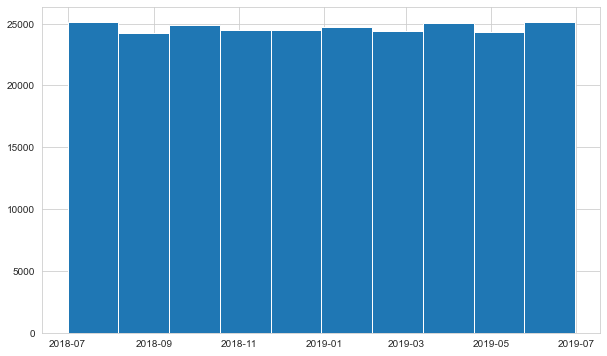

In [84]:
#Use histogram to look at the distribution of transactions by date: balanced.
sns.set_style('whitegrid')
tran.DATE.hist(figsize=(10,6))

<AxesSubplot:>

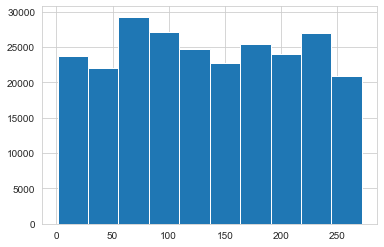

In [85]:
#look at store numbers (recall there are 272 distinct store numbers)
tran.STORE_NBR.hist()

D:\anaconda\test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOT_SALES'>

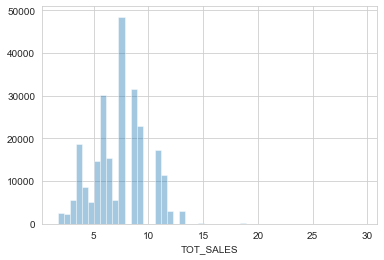

In [86]:
#total sales histogram
sns.distplot(tran.TOT_SALES, kde=False)

<AxesSubplot:xlabel='UNIT_PRICE', ylabel='Density'>

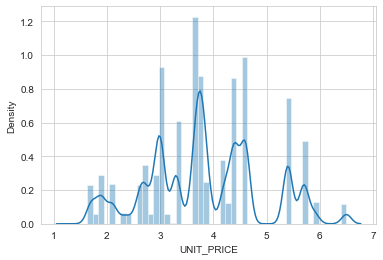

In [87]:
#look at unit price distribution
sns.distplot(tran.UNIT_PRICE)

In [88]:
#Counts of different brands according to packet size
tran.groupby(['BRAND'])['SIZE'].value_counts()

BRAND          SIZE
Burger         220      1564
CCs            175      4551
Cheetos        190      1479
               165      1448
Cheezels       330      3149
               125      1454
Cobs           110      9693
Doritos        170     12613
               150      6376
               380      3183
               330      3052
French         175      1418
Grain Wave     210      6272
               180      1468
Infuzions      110     12694
               70       1507
Kettle         175     19022
               150     19009
               135      3257
Natural        175      7469
Pringles       134     25102
Red Rock Deli  150      8914
               165      7407
Smiths         175      7507
               170      7370
               330      6339
               150      5904
               380      3233
Sunbites       90       3008
Thins          175     14075
Tostitos       175      9471
Twisties       270      6285
               250      3169
Tyrrells       165     

D:\anaconda\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions of Different Brands')

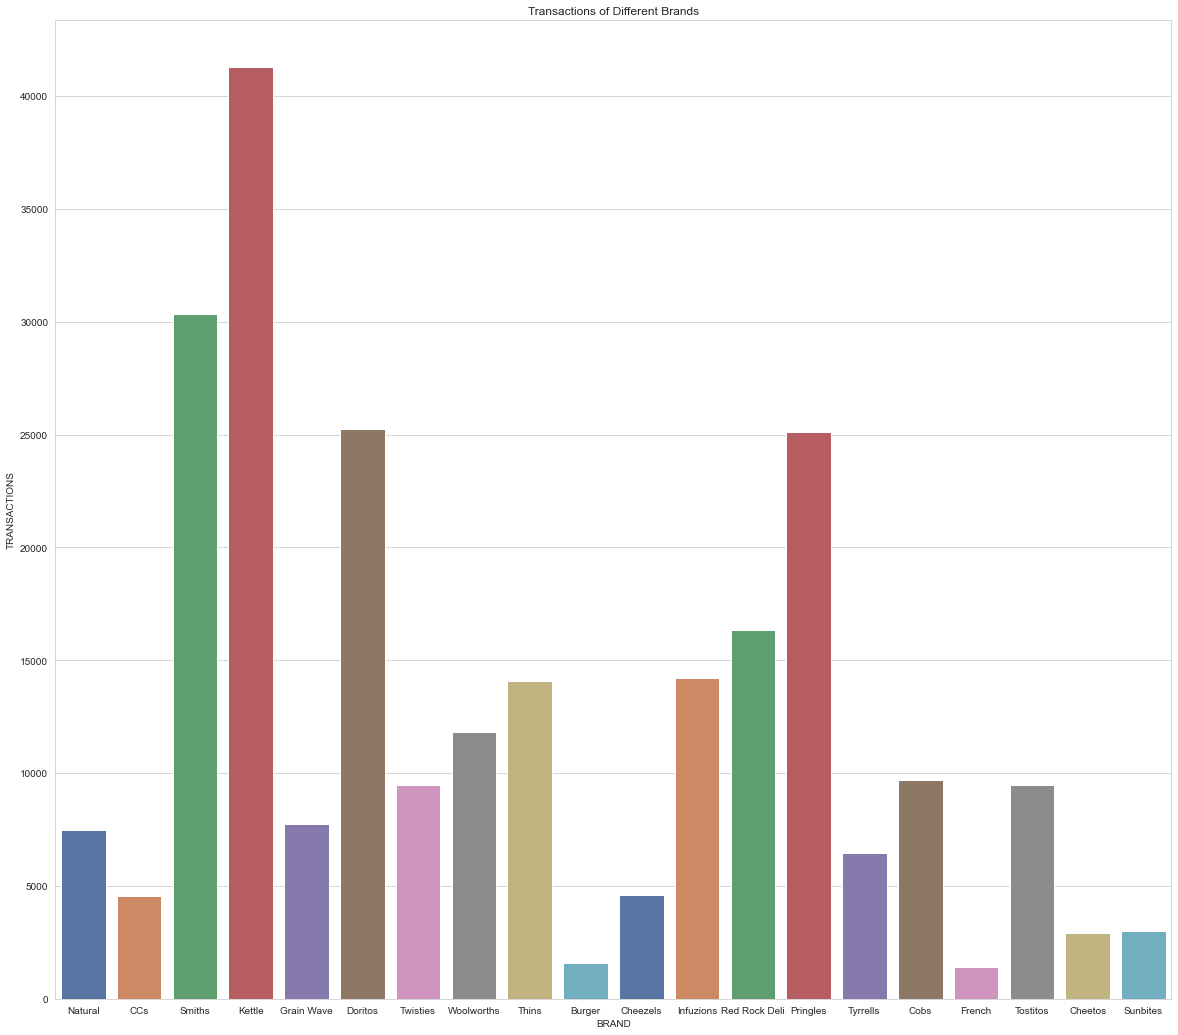

In [89]:
#Plot data by brands, 'deep' for categorical variables.
fig,ax = plt.subplots(figsize=(20,18))
sns.countplot(tran['BRAND'],palette='deep').set(ylabel='TRANSACTIONS')
plt.title("Transactions of Different Brands")

<ipython-input-90-76b25faa3403>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tran['SIZE'] = tran['SIZE'].astype(int)
D:\anaconda\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Transactions of Different Package Sizes')

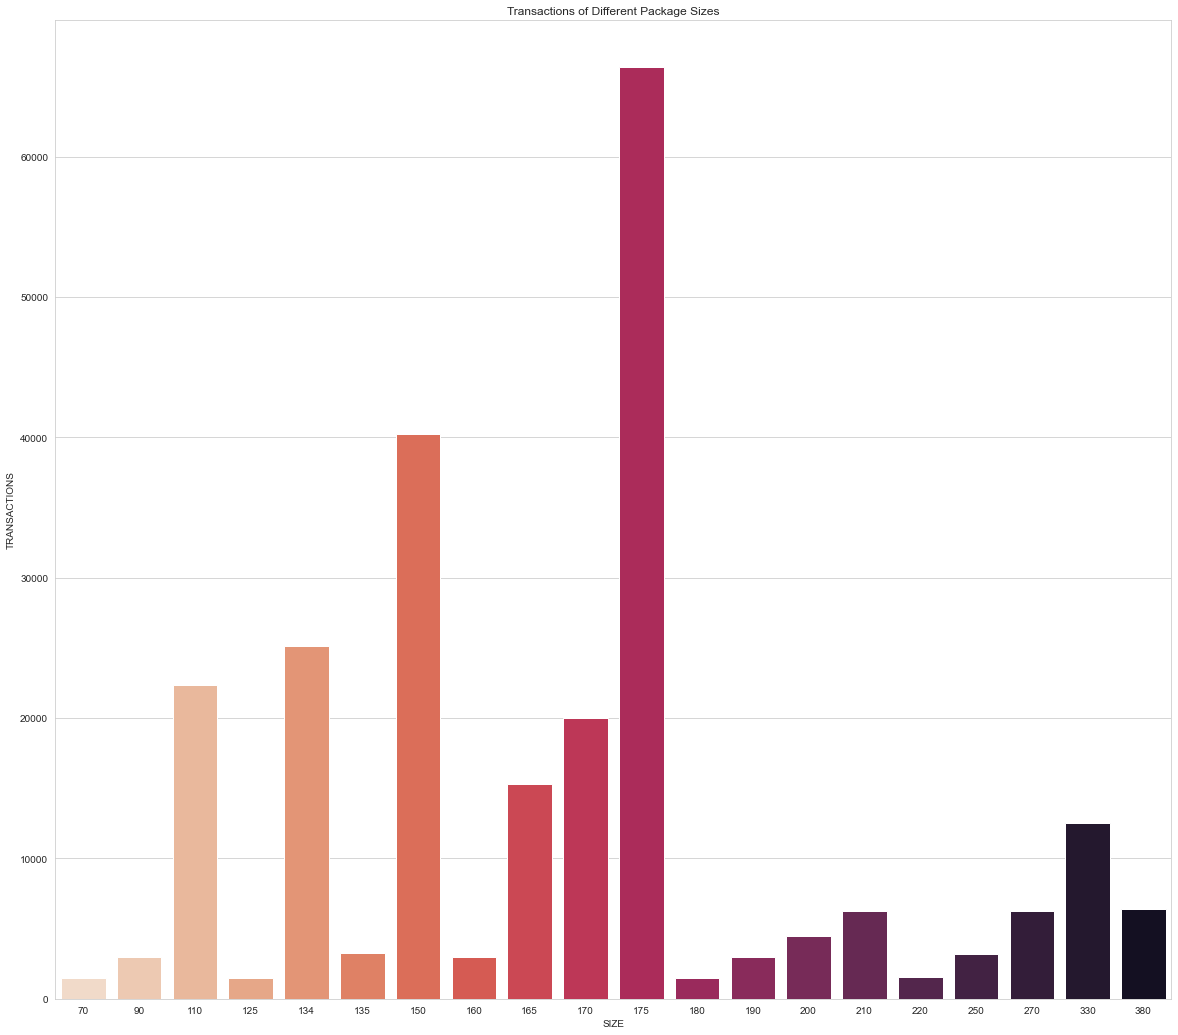

In [90]:
#Plot data by package size, 'rocket' for quantitative variables.
tran['SIZE'] = tran['SIZE'].astype(int)
fig,ax = plt.subplots(figsize=(20,18))
sns.countplot(tran['SIZE'],palette='rocket_r').set(ylabel='TRANSACTIONS')
plt.title("Transactions of Different Package Sizes")

In [91]:
#look at data types
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [92]:
#compare LYLTY_CARD_NBR from both original data sets
set(purchase_behaviour.LYLTY_CARD_NBR.unique()) == set(transaction_data.LYLTY_CARD_NBR.unique())

True

D:\anaconda\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Purchases of Different LIFESTAGES')

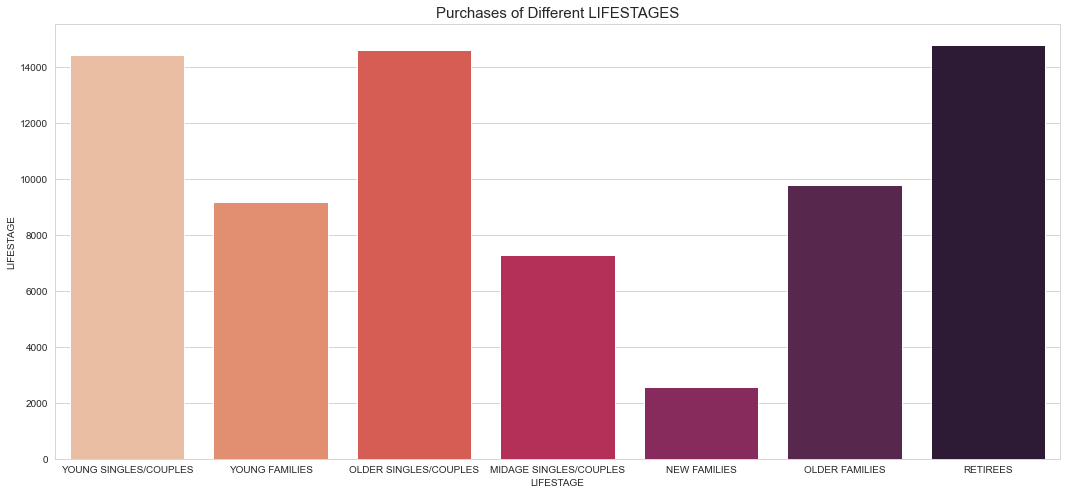

In [93]:
#plot lifestage data to check distribution
plt.figure(figsize=(18,8))
sns.countplot(purchase_behaviour['LIFESTAGE'],palette='rocket_r').set(ylabel='LIFESTAGE')
plt.title("Purchases of Different LIFESTAGES", {'fontsize':15})

From the bar graph, we see that most customers are retirees, older singles/couples, and young singles/couples, while least customers are new families.

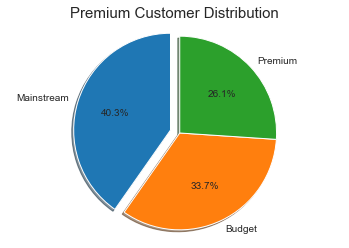

<Figure size 2160x720 with 0 Axes>

In [94]:

labels = ["Mainstream","Budget",'Premium']
size = [purchase_behaviour["PREMIUM_CUSTOMER"].value_counts()[0],purchase_behaviour["PREMIUM_CUSTOMER"].value_counts()[1],purchase_behaviour["PREMIUM_CUSTOMER"].value_counts()[2]]
explode = (0.1,0,0)
fig1,ax1 = plt.subplots()
ax1.pie(size,explode = explode,labels=labels,autopct = '%1.1f%%',shadow = True, startangle = 90)
ax1.axis('equal')#ensure aspect ratio ensures that pie is drawn a circle
plt.title("Premium Customer Distribution", {'fontsize':15})
plt.figure(figsize=(30,10))
plt.show()

In [95]:
purchase_behaviour["PREMIUM_CUSTOMER"].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

D:\anaconda\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Number of Customers by Groups')

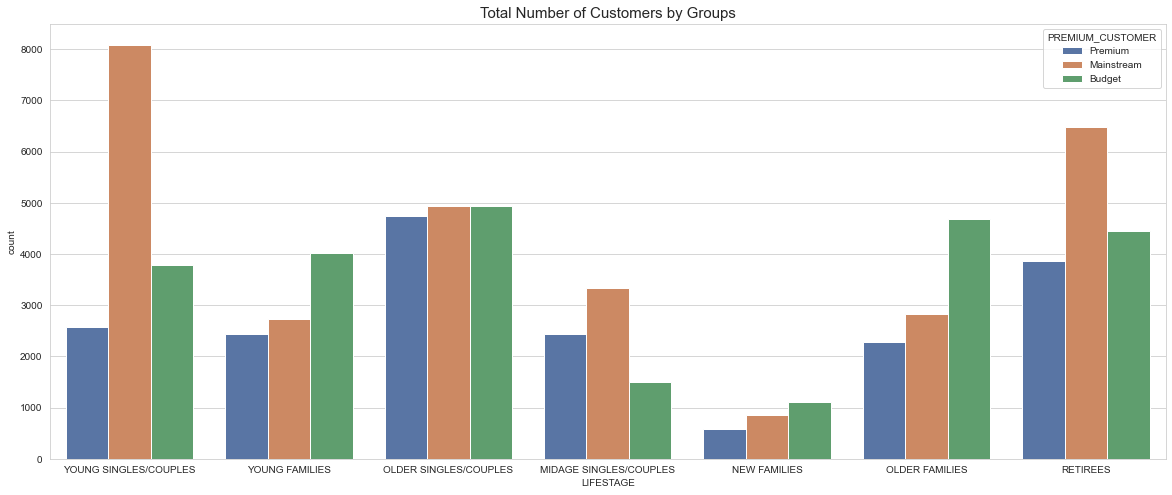

In [96]:
#Combine LIFESTAGE and PREMIUM_CUSTOMER for comparison.
plt.figure(figsize=(20,8))
sns.countplot(purchase_behaviour['LIFESTAGE'],palette='deep',hue=purchase_behaviour['PREMIUM_CUSTOMER'])
plt.title("Total Number of Customers by Groups", {'fontsize':15})

In [97]:
#merge data from the two tables (with outliers removed) - left join.
df = tran.merge(purchase_behaviour, how='left', on='LYLTY_CARD_NBR')
df.shape

(246740, 13)

In [98]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SIZE,UNIT_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Chip Compny SeaSalt,2,6.0,Natural,175,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Nacho Cheese,3,6.3,CCs,175,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Crinkle Cut Chips Chicken,2,2.9,Smiths,170,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Chip Thinly S/Cream&Onion,5,15.0,Smiths,175,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Tortilla ChpsHny&Jlpno Chili,3,13.8,Kettle,150,4.60,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Sweet Chilli And Sour Cream,2,10.8,Kettle,175,5.40,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Splash Of Lime,1,4.4,Tostitos,175,4.40,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Mexicana,2,8.8,Doritos,170,4.40,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Corn Chip Mexican Jalapeno,2,7.8,Doritos,150,3.90,YOUNG SINGLES/COUPLES,Premium


In [99]:
#Find the total sales, total product quantities, and number of customers for each group.
df_total = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg({'TOT_SALES':'sum',
                        'PROD_QTY':'sum','TXN_ID':'count'}).reset_index()

#Group lifestage and premium customer colomns to form a new column "GROUP".
df_total['GROUP'] = df_total.LIFESTAGE + '_' + df_total.PREMIUM_CUSTOMER
df_total.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,TXN_ID,GROUP
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,8883,4691,MIDAGE SINGLES/COUPLES_Budget
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25,21213,11095,MIDAGE SINGLES/COUPLES_Mainstream
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,14400,7612,MIDAGE SINGLES/COUPLES_Premium
3,NEW FAMILIES,Budget,20607.45,5241,2824,NEW FAMILIES_Budget
4,NEW FAMILIES,Mainstream,15979.70,4060,2185,NEW FAMILIES_Mainstream


Text(0.5, 1.0, 'Total Sales by Lifestages and Premium Types')

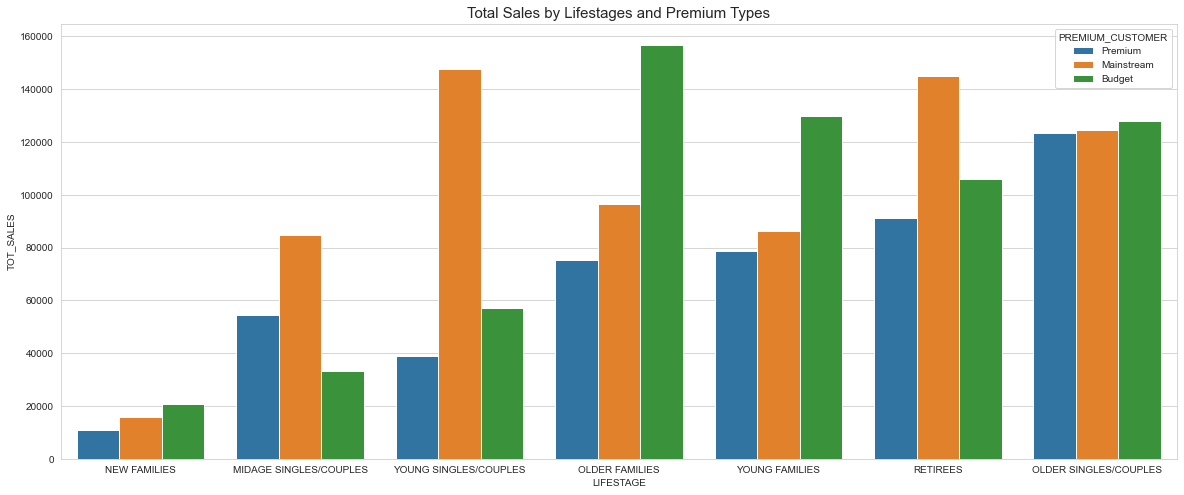

In [100]:
#Use bar graph to compare total sales.
df_sales = df_total.sort_values('TOT_SALES')
plt.figure(figsize=(20,8))
sns.barplot(x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data=df_sales)
plt.title("Total Sales by Lifestages and Premium Types", {'fontsize':15})

Older families-Budget group has the highest sales, followed by young singles/couples-Mainstream group and retirees-Mainstream goup.

Text(0.5, 1.0, 'Total Number of Customers by Groups')

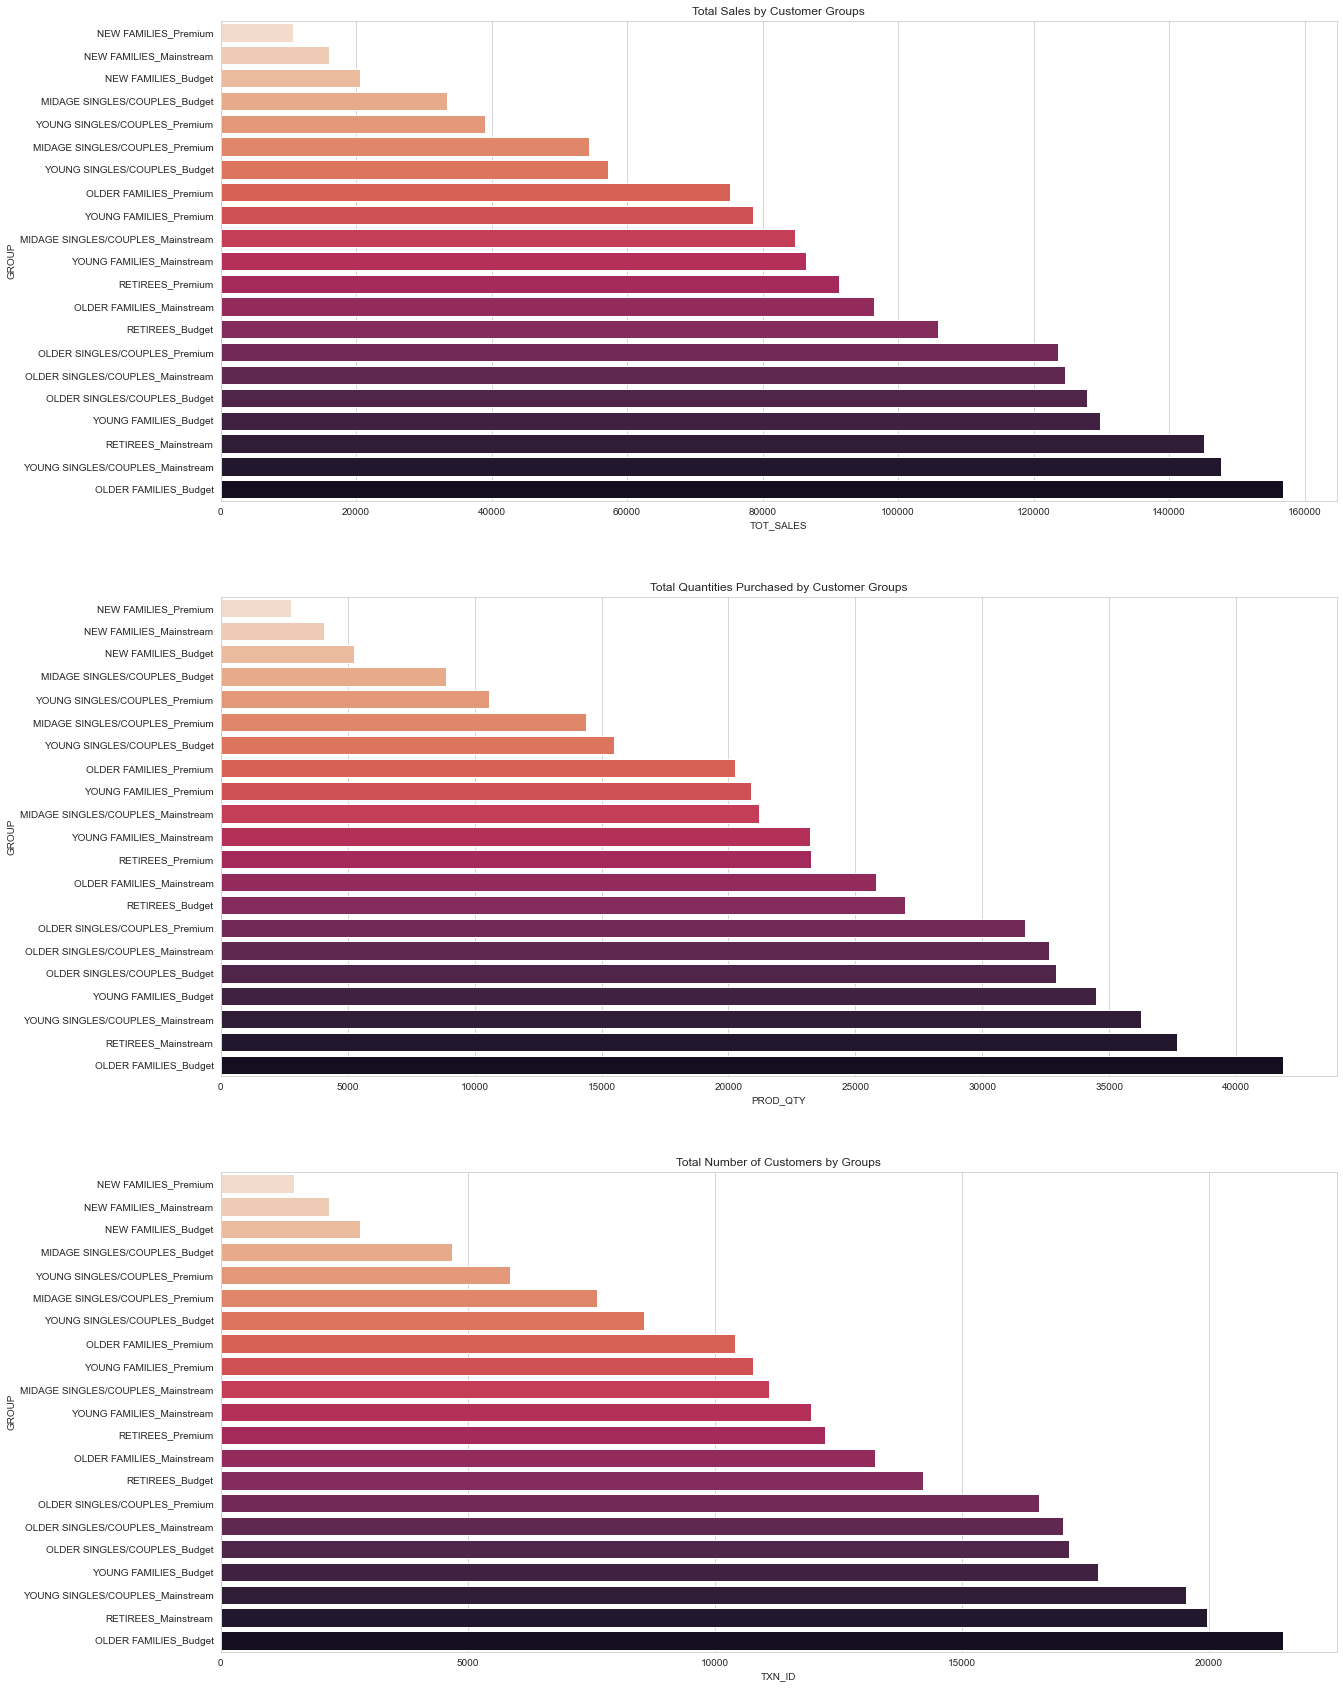

In [101]:
#Create 3 horizontal bar graphs to display total sales, 
#product quantities, and number of customers by group.
fig, ax = plt.subplots(figsize=(20,30))
plt.subplot(3,1,1)
df_TA = df_total.sort_values('TOT_SALES')
sns.barplot(y='GROUP', x='TOT_SALES', data=df_TA, orient='h', palette='rocket_r')
plt.title("Total Sales by Customer Groups")

plt.subplot(3,1,2)
df_PQ = df_total.sort_values('PROD_QTY')
sns.barplot(y='GROUP', x='PROD_QTY', data=df_PQ, orient='h', palette='rocket_r')
plt.title("Total Quantities Purchased by Customer Groups")

plt.subplot(3,1,3)
df_TI = df_total.sort_values('TXN_ID')
sns.barplot(y='GROUP', x='TXN_ID', data=df_TI, orient='h', palette='rocket_r')
plt.title("Total Number of Customers by Groups")

The customers group "OLDER FAMILIES_Budget" has the most sales, highest quantities purchased, and most number of customers, while NEW FAMILIES in general have the least of all.


## Colclusion from answer sheet

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.


# Part 2:Experimentation and uplift testing

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   BRAND             246740 non-null  object        
 9   SIZE              246740 non-null  int32         
 10  UNIT_PRICE        246740 non-null  float64       
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), objec

In [111]:
#insert columns year month for better plots and analysis 
#df.insert(1, 'YEAR_MONTH',df['DATE'].dt.to_period('M'))
df.insert(2, 'YEAR',df['DATE'].dt.to_period('Y'))
df.head()

,DATE,YEAR_MONTH,YEAR,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,SIZE,UNIT_PRICE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,2018-10,2018,1,1000,1,5,Chip Compny SeaSalt,2,6.0,Natural,175,3.00,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,2019-05,2019,1,1307,348,66,Nacho Cheese,3,6.3,CCs,175,2.10,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,2019-05,2019,1,1343,383,61,Crinkle Cut Chips Chicken,2,2.9,Smiths,170,1.45,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2018-08,2018,2,2373,974,69,Chip Thinly S/Cream&Onion,5,15.0,Smiths,175,3.00,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2018-08,2018,2,2426,1038,108,Tortilla ChpsHny&Jlpno Chili,3,13.8,Kettle,150,4.60,MIDAGE SINGLES/COUPLES,Budget


In [104]:
cols_with_changed_dtype = {'PROD_NAME': 'category','LIFESTAGE': 'category', 'PREMIUM_CUSTOMER': 'category','BRAND': 'category'}
df = df.astype(cols_with_changed_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   YEAR_MONTH        246740 non-null  period[M]     
 2   STORE_NBR         246740 non-null  int64         
 3   LYLTY_CARD_NBR    246740 non-null  int64         
 4   TXN_ID            246740 non-null  int64         
 5   PROD_NBR          246740 non-null  int64         
 6   PROD_NAME         246740 non-null  category      
 7   PROD_QTY          246740 non-null  int64         
 8   TOT_SALES         246740 non-null  float64       
 9   BRAND             246740 non-null  category      
 10  SIZE              246740 non-null  int32         
 11  UNIT_PRICE        246740 non-null  float64       
 12  LIFESTAGE         246740 non-null  category      
 13  PREMIUM_CUSTOMER  246740 non-null  category      
dtypes: c

In [105]:
check = df[df['STORE_NBR'].isin([77, 86, 88])].groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum() 
check

STORE_NBR  YEAR_MONTH
77         2018-07        268.40
           2018-08        247.50
           2018-09        216.80
           2018-10        194.30
           2018-11        224.90
           2018-12        255.20
           2019-01        188.40
           2019-02        211.60
           2019-03        255.10
           2019-04        258.10
           2019-05        272.30
           2019-06        246.60
86         2018-07        851.00
           2018-08        726.85
           2018-09        855.00
           2018-10        898.80
           2018-11        851.20
           2018-12        812.20
           2019-01        800.60
           2019-02        872.80
           2019-03        945.40
           2019-04        804.00
           2019-05        826.90
           2019-06        766.00
88         2018-07       1218.20
           2018-08       1242.20
           2018-09       1361.80
           2018-10       1270.80
           2018-11       1311.40
           2018-12   

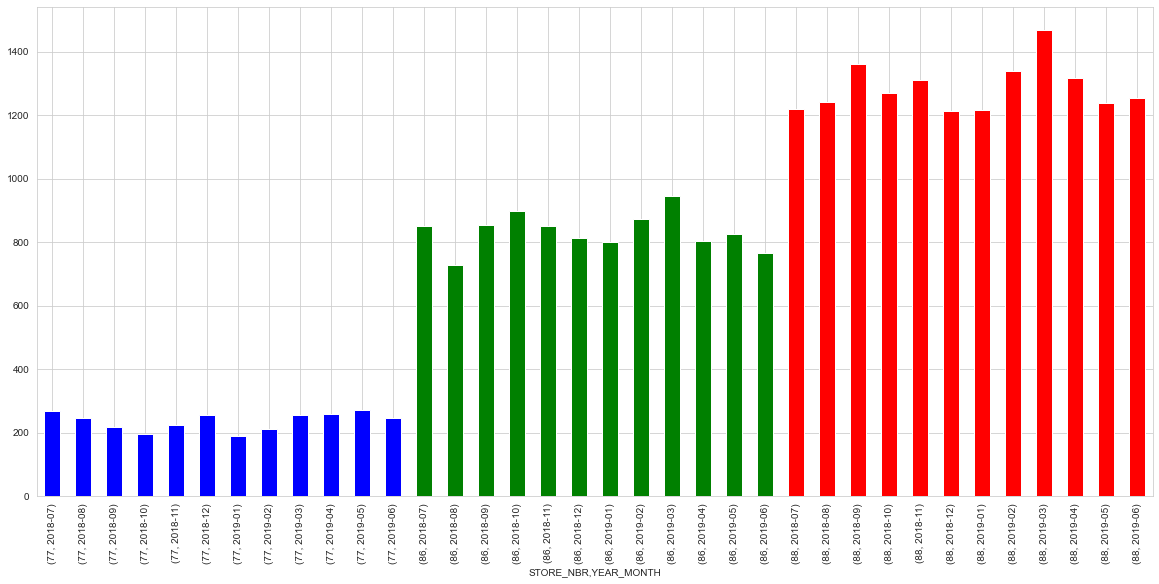

In [109]:
colors = []
for store, month in check.index:
    if store == 77:
        colors.append('b')
    elif store == 86:
        colors.append('g')
    else:
        colors.append('r')

check.plot(kind = 'bar', color = colors, figsize = (20, 9))
plt.show()

In [112]:
df['YEARLY_SALES'] = df.groupby('STORE_NBR')['TOT_SALES'].transform('sum')
df['YEARLY_CUSTOMERS'] = df.groupby('STORE_NBR')['LYLTY_CARD_NBR'].transform('nunique')
df['MONTHLY_SALES'] = df.groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].transform('sum')
df['MONTHLY_CUSTOMERS'] = df.groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].transform('nunique')

In [115]:
#"pre_df" is the dataset which contains samples only before the trial period.
#"trial_df" is the datset which contains samples of trial period.
pre_df = df[df['DATE'] < "2019-02-01"]
trial_df = df[(df['DATE'] > "2019-01-31") & (df['DATE'] < "2019-05-01")]

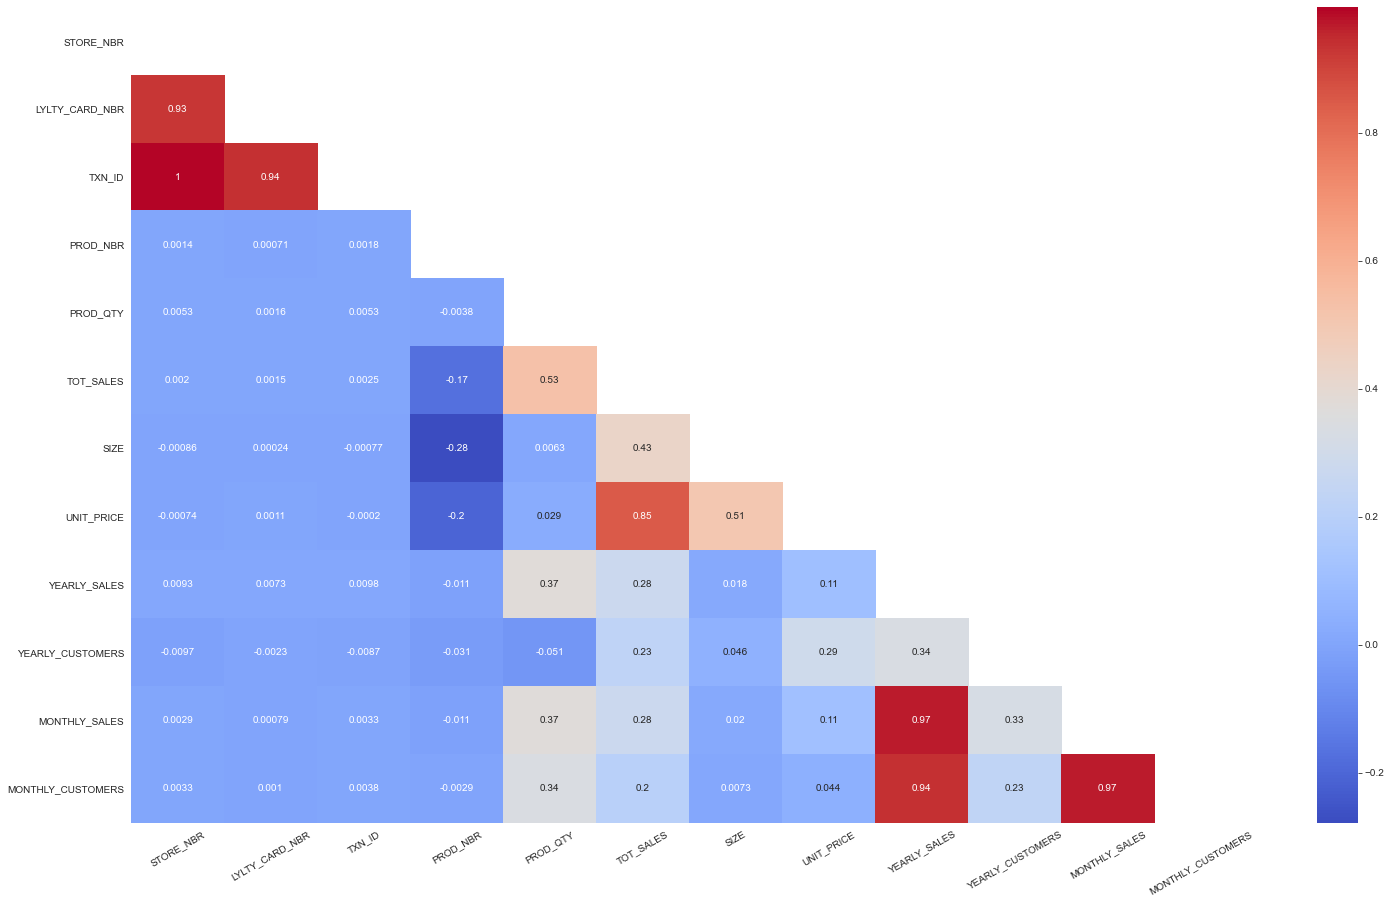

In [117]:
corrmat = pre_df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.subplots(figsize = (25, 15))
sns.heatmap(corrmat, mask = mask, cmap = 'coolwarm', annot = True)
plt.xticks(rotation = 30)
plt.show()


In [118]:
metrics_cols = ['STORE_NBR', 'YEAR_MONTH', 'YEARLY_SALES',
                'YEARLY_CUSTOMERS','MONTHLY_SALES', 'MONTHLY_CUSTOMERS']

In [147]:
def extract_metrics(df):
    subdf = df.loc[:, metrics_cols].set_index(['STORE_NBR', 'YEAR_MONTH']).sort_values(by = ['STORE_NBR', 'YEAR_MONTH'])
    subdf.drop_duplicates(inplace = True, keep = 'first')
    return subdf 

metrics_df = extract_metrics(pre_df)
metrics_df.head()
metrics_df.loc[31]

,YEARLY_SALES,YEARLY_CUSTOMERS,MONTHLY_SALES,MONTHLY_CUSTOMERS
YEAR_MONTH,,,,
2018-09,14.8,2,6.0,1
2018-11,14.8,2,8.8,1


In [142]:
#Function to find correlation between trial stores and control stores one by one.
def calc_corr(trial_store):
    '''
    input: It takes one trial store to compare other stores with.
    output: New dataframe with correlation and mean correlation.
    '''
    a=[]
    metrics = metrics_df[['MONTHLY_SALES', 'MONTHLY_CUSTOMERS']] 
    for i in metrics.index:
        a.append(metrics.loc[trial_store].corrwith(metrics.loc[i[0]]))
    subdf = pd.DataFrame(a)
    subdf.index = metrics.index
    subdf = subdf.drop_duplicates()
    subdf.index = [s[0] for s in subdf.index]
    subdf.index.name ="STORE_NBR"
    subdf = subdf.abs()
    subdf['MEAN_CORR'] = subdf.mean(axis=1)
    subdf.sort_values(by = 'MEAN_CORR', ascending = False, inplace = True)
    return subdf

In [144]:
corr_77 = calc_corr(77).drop(77)
corr_77.head(20)

,MONTHLY_SALES,MONTHLY_CUSTOMERS,MEAN_CORR
STORE_NBR,,,
31,1.000000,NaN,1.000000
11,1.000000,NaN,1.000000
233,0.973643,0.965682,0.969663
119,0.775571,0.919064,0.847318
186,0.917131,0.766873,0.842002
162,0.857584,0.811532,0.834558
113,0.747222,0.901630,0.824426
9,0.813285,0.804504,0.808895
157,0.776545,0.832839,0.804692


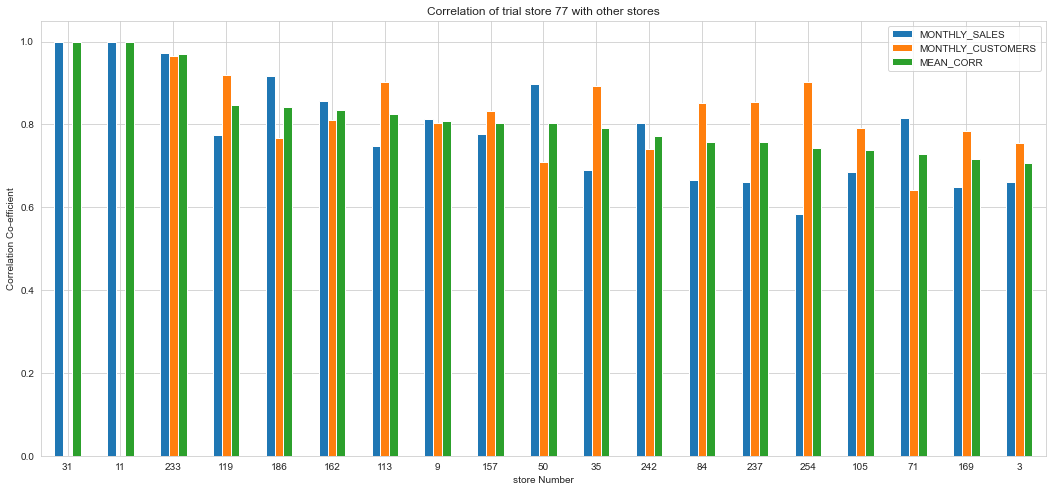

In [149]:
corr_77[corr_77['MEAN_CORR'].abs() > 0.7].plot(kind = 'bar', rot = 0, figsize = (18, 8))
plt.title('Correlation of trial store 77 with other stores')
plt.xlabel('store Number')
plt.ylabel('Correlation Co-efficient')
plt.show()

D:\anaconda\test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


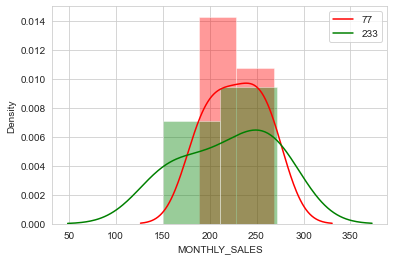

In [151]:
#Monthly Sales
fig, ax = plt.subplots()
sns.distplot(metrics_df.loc[77]['MONTHLY_SALES'], color = 'r', ax = ax)
sns.distplot(metrics_df.loc[233]['MONTHLY_SALES'], color = 'g', ax = ax)
plt.legend(labels = ['77', '233'])
plt.show()

D:\anaconda\test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\test\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


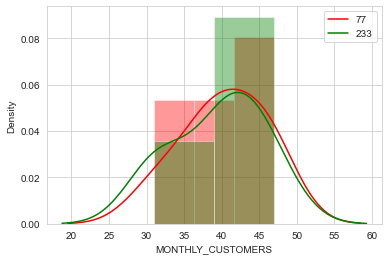

In [153]:
#monthly customers
fig, ax = plt.subplots()
sns.distplot(metrics_df.loc[77]['MONTHLY_CUSTOMERS'], color = 'r', ax = ax)
sns.distplot(metrics_df.loc[233]['MONTHLY_CUSTOMERS'], color = 'g', ax = ax)
plt.legend(labels = ['77', '233'])
plt.show()

In [154]:
from scipy.stats import ks_2samp,ttest_ind,t

In [159]:
cols_under_consideration = ['MONTHLY_SALES', 'MONTHLY_CUSTOMERS']
a=[]
for x in metrics_df[cols_under_consideration]:
    print(x)
    a.append(ks_2samp(metrics_df.loc[77][x], metrics_df.loc[233][x]))
a=pd.DataFrame(a, index = cols_under_consideration)
a.head()

MONTHLY_SALES
MONTHLY_CUSTOMERS


,statistic,pvalue
MONTHLY_SALES,0.285714,0.962704
MONTHLY_CUSTOMERS,0.142857,0.999961


In [2]:
compare the trial store with the control store in the trial period
trial_metrics_df = extract_metrics(trial_df)
trial_metrics_df.head()

From the dataframe above we can say that both are similar (pvalues are high close to 1). Hence we cannot reject our null hypothesis.

In [161]:
b = []
for x in trial_metrics_df[cols_under_consideration]:
    b.append(ks_2samp(trial_metrics_df.loc[77][x], trial_metrics_df.loc[233][x]))
b = pd.DataFrame(b, index = cols_under_consideration)
b.head()

,statistic,pvalue
MONTHLY_SALES,0.666667,0.6
MONTHLY_CUSTOMERS,0.666667,0.6


Since both the pvalues are >5 we reject the null hypothesis. Since both the stores are similar in pre-trial but not in trial period hence we reject the null hypothesis.